# Train on Full Dataset

Now that we've created a dataset, let's try training on it.

In [1]:
from fastai.core import *
from fastai.vision import *
from fastai.vision.models import resnet18, resnet101

In [2]:
path = Path('../data/cropped_faces')

In [3]:
src = ImageList.from_folder(path).split_by_folder(train='train', valid='valid')

In [4]:
def get_data(bs,size):
    data = (src.label_from_re('([A-Z]+).jpg$')
           .transform(get_transforms(max_warp=0, max_zoom=1), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [5]:
bs, sz = 32, 256
data = get_data(bs, sz)

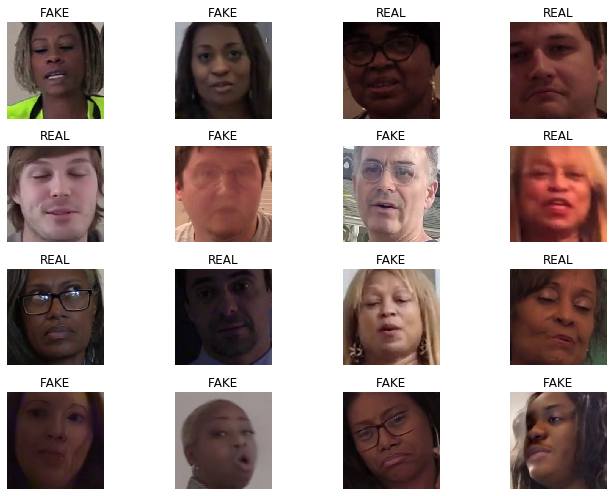

In [6]:
data.show_batch(rows=4, figsize=(10,7))

In [7]:
# !pip install efficientnet-pytorch
from efficientnet_pytorch import EfficientNet

Loaded pretrained weights for efficientnet-b1


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


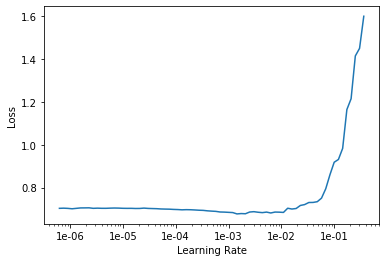

In [8]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=data.c)
learner = Learner(data, model, metrics=[accuracy])

learner.lr_find()
learner.recorder.plot()

In [9]:
learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.282341,0.287270,0.876021,11:16
1,0.285074,0.297851,0.873618,11:15
2,0.236578,0.422167,0.815954,11:15
3,0.207514,0.244752,0.895082,11:15
4,0.183168,0.244093,0.893641,11:16
5,0.125614,0.248157,0.907577,11:16
6,0.108635,0.190877,0.922954,11:16
7,0.072448,0.195205,0.927919,11:15
8,0.052026,0.197784,0.930002,11:18
9,0.039540,0.206637,0.929681,11:34


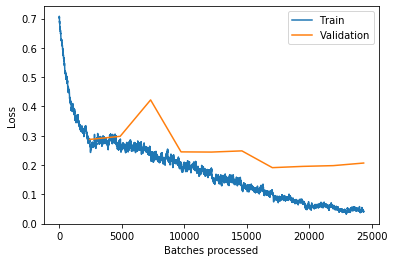

In [16]:
learner.recorder.plot_losses()

In [11]:
learner.export("effnet1_0.929681")